7128 * var * Momentum4D[rho: float32, phi: float32, eta: float32, tau: float64]
Outer shape (number of lists): [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..., 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Inner shapes (lengths of each inner list): [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

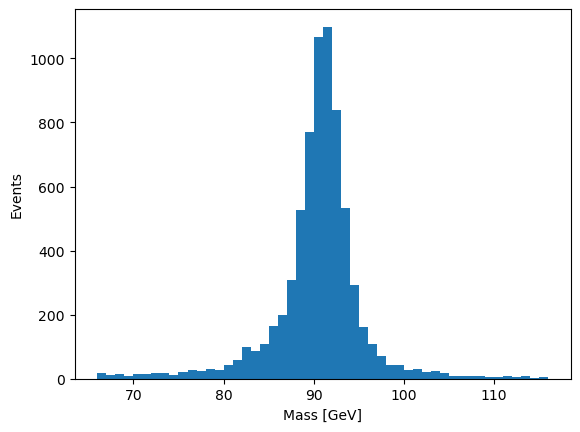

In [8]:
import uproot
import awkward as ak
import vector
import matplotlib.pyplot as plt

# Open the .root file and extract the muon data
tree = uproot.open('../Delphes/delphes_output.root:Delphes')
events = tree.arrays(['Event.Weight','Muon_size','Muon.PT','Muon.Eta','Muon.Phi'])

# create filters to select the events of interest
nmuon_mask = events['Muon_size'] == 2

# create the dimuon system
muons = vector.zip({'pt':events['Muon.PT'],'eta':events['Muon.Eta'],'phi':events['Muon.Phi'],'mass':0.10566})
dimuon = muons[nmuon_mask]
print(dimuon.type)
outer_length = ak.num(dimuon)
print("Outer shape (number of lists):", outer_length)
# Inner shape (lengths of each nested list)
inner_lengths = ak.num(dimuon, axis=1)
print("Inner shapes (lengths of each inner list):", inner_lengths.tolist())
    

#calculate the dimuon invariant mass and plot it using matplotlib
dimuon_mass = (dimuon[:,0]+dimuon[:,1]).mass
plt.hist(dimuon_mass,bins=50, range=(66,116))
plt.xlabel('Mass [GeV]')
plt.ylabel('Events')
plt.show()



